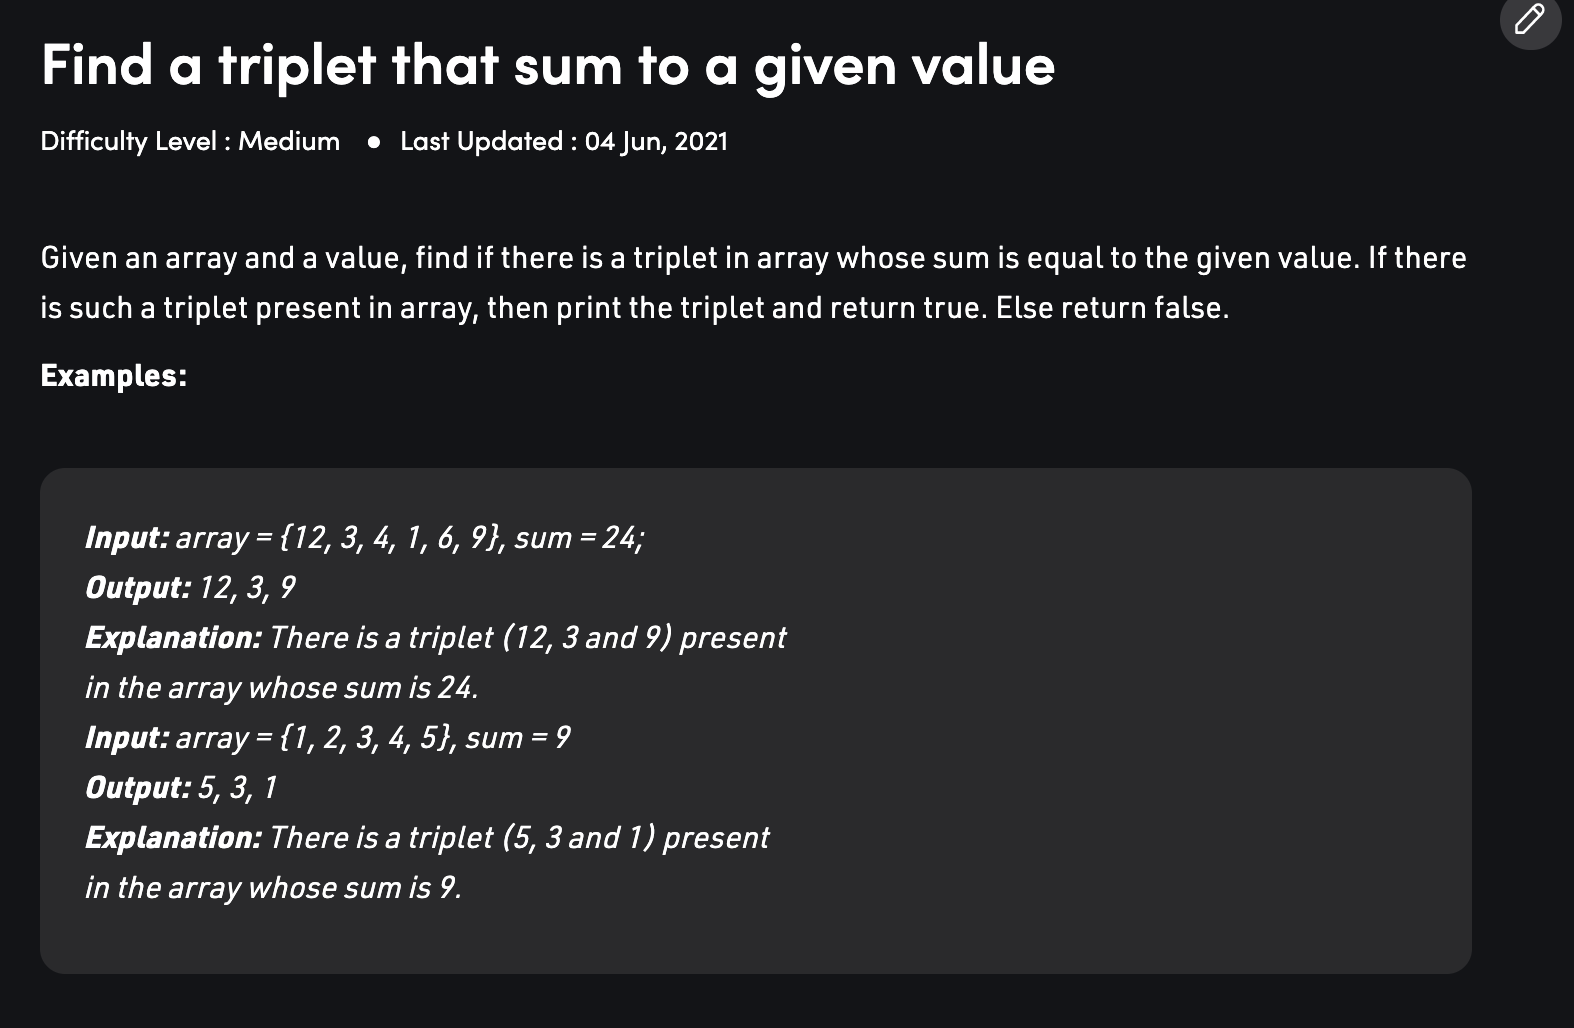

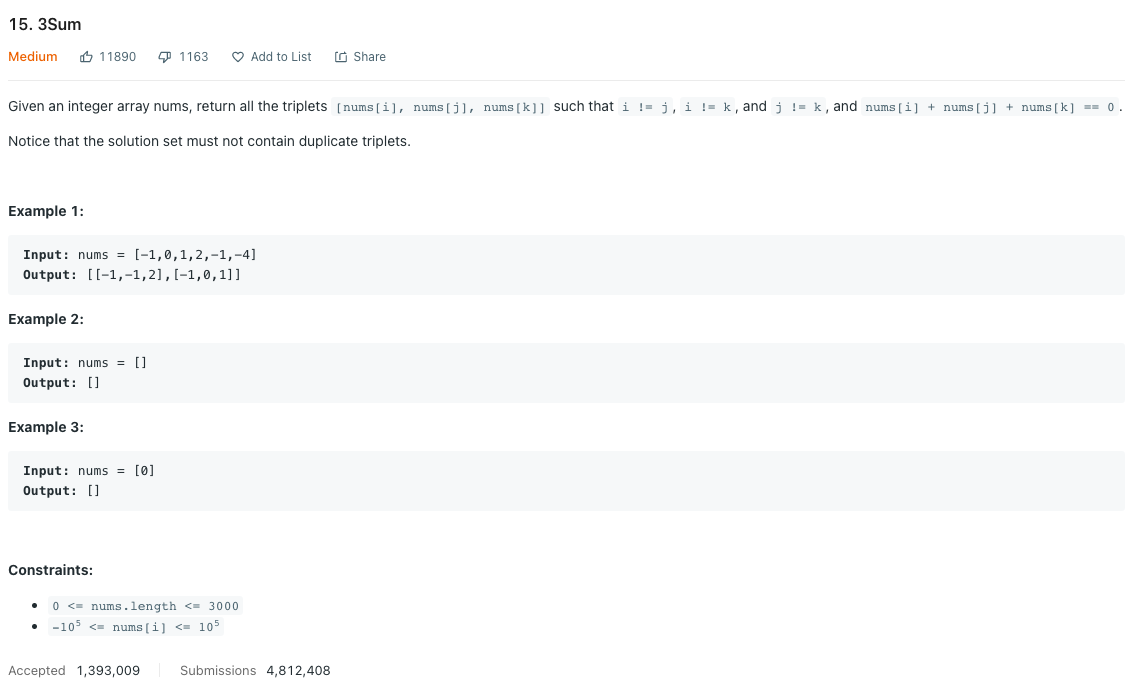

    Approach 1 : 
    
        TimeComplexity : O(n^3)
        Space Complexity :    O(1) 

In [1]:
def threeNumSum_V1(arr,x):
    solution = []
    for i in range(len(arr)-2):
        for j in range(i+1,len(arr)-1):
            for k in range(j+1,len(arr)):
                if arr[i]+arr[j]+arr[k] == x :
                    solution.append([arr[i],arr[j],arr[k]])
    return solution

In [2]:
arr = [12,3,1,2,-6,5,-8,6]
x = 0

In [3]:
ans = threeNumSum_V1(arr,x)
print(ans)

[[3, 5, -8], [1, -6, 5], [2, -8, 6]]


In [5]:
arr = [-1,0,1,2,-1,-4]
x = 0
ans = threeNumSum_V1(arr,x)
print(ans)

[[-1, 0, 1], [-1, 2, -1], [0, 1, -1]]


    The only challenge is that the first element and last elements are  same consisting -1,0 and 1 in different order

In [4]:
arr = [12, 3, 4, 1, 6, 9]
x = 24
ans = threeNumSum_V1(arr,x)
print(ans)

[[12, 3, 9]]


### Approach 2 : 

    Approach 2 : 
         >> sort the array then 
         >> fix the first element via looping and then rest of the array looks for sum-first element value using two pointer appraoch
    
        TimeComplexity : O(nlogn + n^2) = O(n^2)
        Space Complexity :    O(n) # for storing the solution triplets 

In [6]:
def threeNumSum_V2(arr,x):
    solution = []
    arr.sort()                                     # O(nlogn)  #space O(n)
    
    for i in range(len(arr)-2):                    #  O(n) i.e. n times 
        left = i+1
        right = len(arr)-1
        
        while left < right :                       # O(n)
            
            currSum = arr[i] + arr[left] + arr[right]
            
            if currSum > x :
                right -= 1
            
            elif currSum < x:
                left += 1
            
            else:
                solution.append([ arr[i], arr[left],arr[right] ]  )
                left += 1
                right -= 1
                
    return solution

In [7]:
arr = [12,3,1,2,-6,5,-8,6]
x = 0
ans = threeNumSum_V2(arr,x)
print(ans)

[[-8, 2, 6], [-8, 3, 5], [-6, 1, 5]]


In [8]:
arr = [12, 3, 4, 1, 6, 9]
x = 24
ans = threeNumSum_V2(arr,x)
print(ans)

[[3, 9, 12]]


In [9]:
arr = [-1,0,1,2,-1,-4]
x = 0
ans = threeNumSum_V2(arr,x)
print(ans)

[[-1, -1, 2], [-1, 0, 1], [-1, 0, 1]]


     The only challenge is that the first element and last elements are same consisting -1,0 and 1 in different order.

     Solution Thought process walkthrough :

     1. Just befor adding the solution list ...
           >>  sort it and check that if it already exists 
           >>  if yes no need to add else add it 
           
     This appraoch slows down teh execution speed.
            
    Note : Do we really need to sort it  ???  A better solution appraoch is mention below .

In [80]:
def threeSum(nums , x = 0):
        final = []
        nums.sort()
        for k in range(len(nums)-2):
            
            i,j = k+1,len(nums)-1
            
            while i < j :
                if nums[k]+nums[i]+nums[j] < 0:
                    i += 1
                elif nums[k]+nums[i]+nums[j] > 0:
                    j -= 1
                else:
                    sol = [nums[k],nums[i],nums[j]]
                    if sol not in final:
                        final.append([nums[k],nums[i],nums[j]])
                    i += 1
                    j -= 1
        return final

In [81]:
arr = [-1,0,1,2,-1,-4]
x = 0
ans = threeSum(arr,x)
print(ans)

[[-1, -1, 2], [-1, 0, 1]]


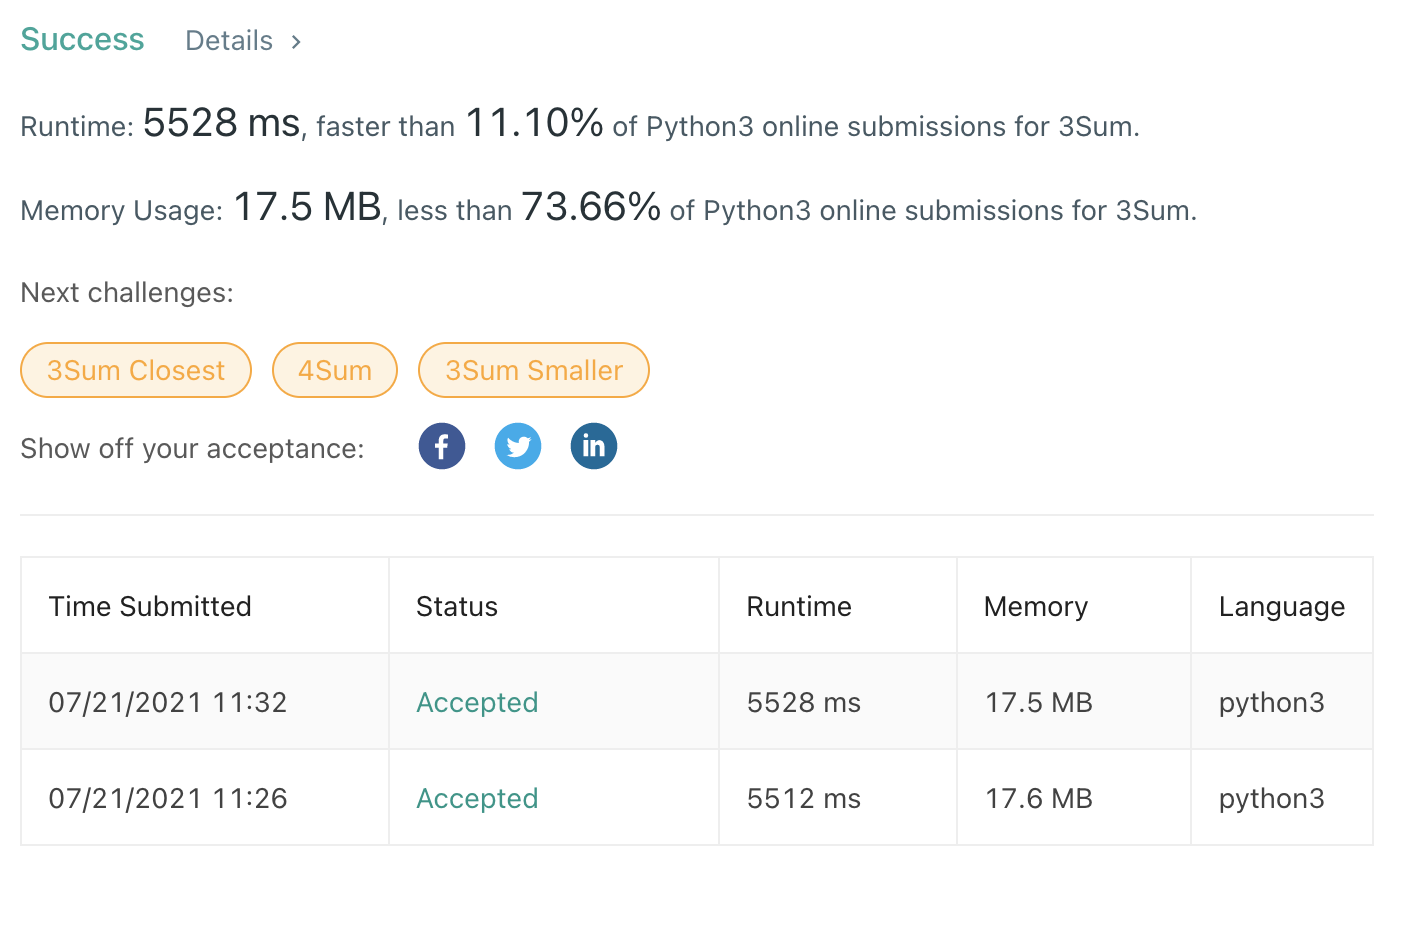

     Better Solution Thought process walkthrough :

    1. Before we fix lets observe one thing that 

     >>    even if we do have repetations we will have repetations like [-1,0,1] & [-1,0,1] and never in out of order as we have sorted teh original array 
        
     >>    So basically we will have duplicate elements 

     >>    Need a data structure which wont add duplicate elements 
       
     >>    So the obvious answer is set, but in set you can not add list elements as they are not hasable so we will add solutions as tuples in the set and suplicates will be take care of ....
        

    Using set makes it even more faster :

In [82]:
def threeSum_v2(nums , x = 0):
        finalset = set()
        nums.sort()
        for k in range(len(nums)-2):
            
            i,j = k+1,len(nums)-1
            
            while i < j :
                if nums[k]+nums[i]+nums[j] < 0:
                    i += 1
                elif nums[k]+nums[i]+nums[j] > 0:
                    j -= 1
                else:
                    finalset.add((nums[k],nums[i],nums[j]))
                    i += 1
                    j -= 1
        
        return list(finalset)

In [83]:
arr = [-1,0,1,-1]
arr.sort()
print(arr)
x = 0
ans = threeSum_v2(arr,x)
print(ans)

[-1, -1, 0, 1]
[(-1, 0, 1)]


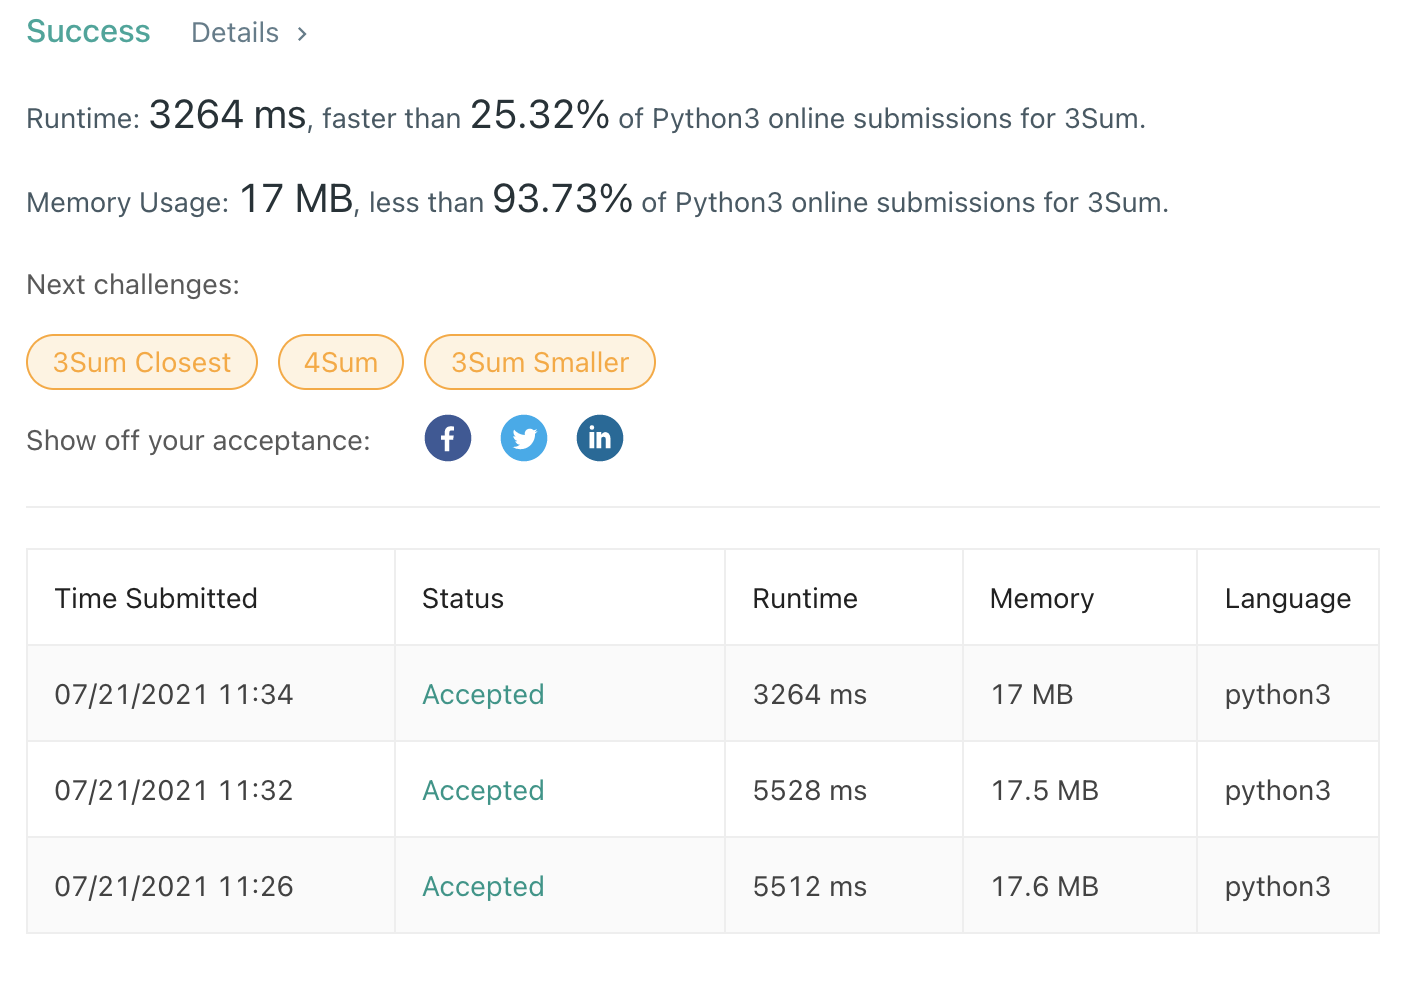

### Most efficient solution 

In [84]:
def threeSum_V3(nums , x = 0):
    res = set()
    nums.sort()
    _set = set()
    for i in range(len(nums)):
        if not(i > 2 and nums[i] == nums[i-2]): 
            for j in range(i+1, len(nums)):
                sol = -(nums[i]+nums[j])
                if sol in _set:
                    res.add((nums[i], nums[j], sol))
            _set.add(nums[i])
            
    return list(res)

In [85]:
arr = [-1,0,1,2,-1,-4]
x = 0
ans = threeSum_V3(arr,x)
print(ans)

[]
